# 05-Numerical Data



### Imports

In [1]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path # pathlib: object-oriented filesystem paths
import seaborn as sns #  seaborn : library for making statistical graphics in Python (visualization)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

### Load Train Data

In [3]:
data_dir = Path('../../dacon-inputs/dankook/input')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42

In [4]:
data_dir.resolve()

WindowsPath('C:/Users/bryan/dacon-inputs/dankook/input')

In [5]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0


### EDA (Exploratory Data Analysis)

In [6]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

19 numerical variables

In [7]:
trn.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


We can see that some of the numerical data is negative (-)

In [8]:
target_col = 'u'
pred_col = 'pred'
# num_cols = [x for x in trn.columns if trn[x].dtype in [np.int64, np.float64] and x != target_col]
num_cols = ['g', 'r', 'i', 'z']
print(num_cols)

['g', 'r', 'i', 'z']


<AxesSubplot:>

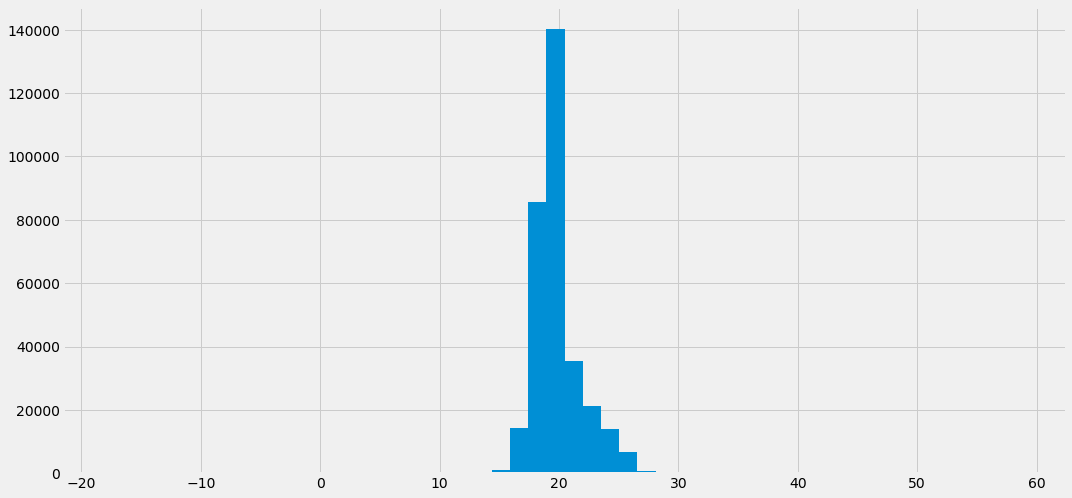

In [9]:
trn.u.hist(bins=50)

### RMSE/RMLSE Loss Function

In [10]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

### LR w/o Factoring

In [11]:
lr = LinearRegression()
lr.fit(trn[num_cols], trn[target_col])  # lr.fit(X, y) -> target_col based on num_cols
trn[pred_col] = lr.predict(trn[num_cols])  # lr.predict(X)

print(f' RMSE:\t{rmse(trn[target_col], trn[pred_col]):12.2f}')

 RMSE:	        1.12


In [12]:
lr.coef_, lr.intercept_

(array([ 8.31287622e-04,  1.08495620e+00, -2.55057848e-04, -7.93566004e-05]),
 0.6003482289682225)

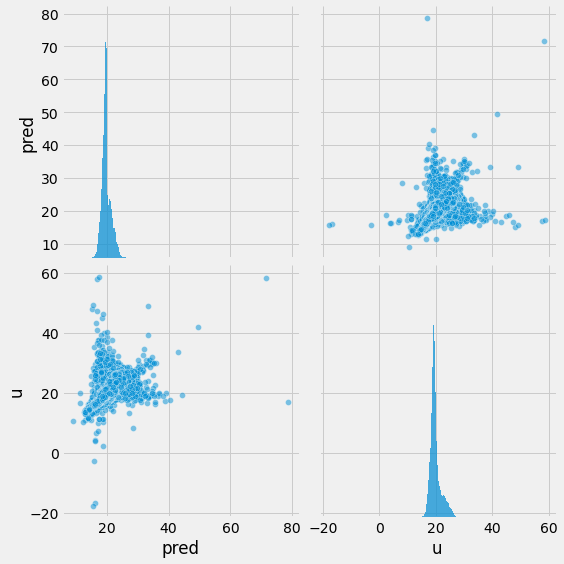

In [13]:
sns.pairplot(data=trn, vars=[pred_col, target_col], height=4, plot_kws={'alpha': .5})

### LR w/ Factoring (log1p)

<AxesSubplot:>

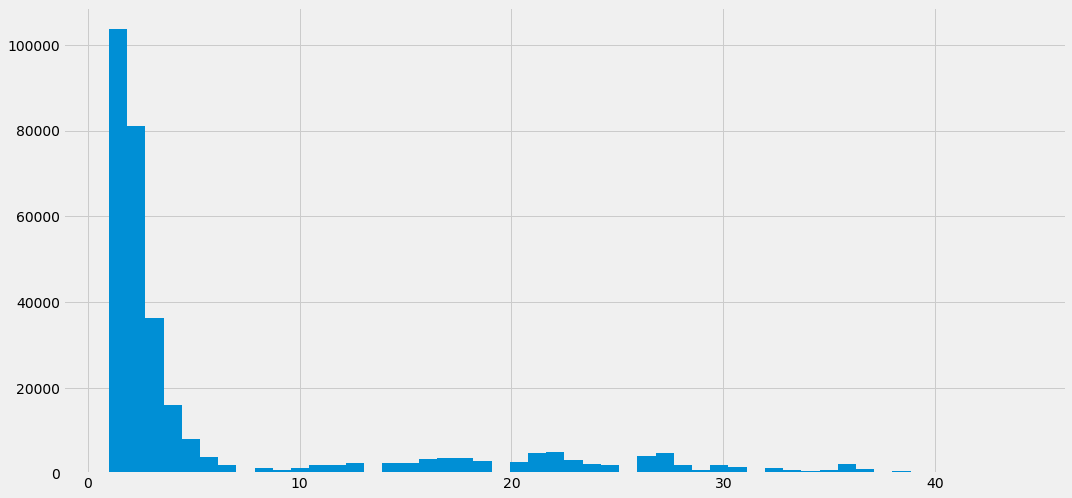

In [14]:
trn.nObserve.hist(bins=50)

In [15]:
target_col = 'nObserve'
pred_col = 'pred'
num_cols = ['u', 'g', 'r', 'i', 'z']

In [16]:
lr = LinearRegression()
lr.fit(trn[num_cols], trn[target_col])  # lr.fit(X, y) -> target_col based on num_cols
trn[pred_col] = lr.predict(trn[num_cols])  # lr.predict(X)

print(f' RMSE:\t{rmse(trn[target_col], trn[pred_col]):12.2f}')

 RMSE:	        8.64


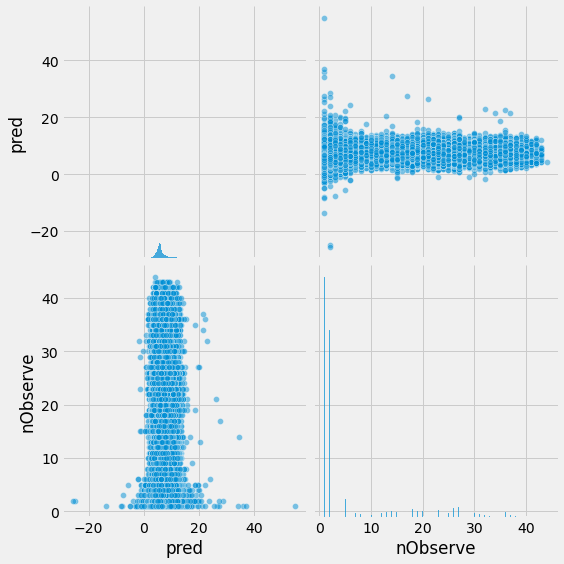

In [17]:
sns.pairplot(data=trn, vars=[pred_col, target_col], height=4, plot_kws={'alpha': .5})

Inaccurate: needs factoring

<AxesSubplot:>

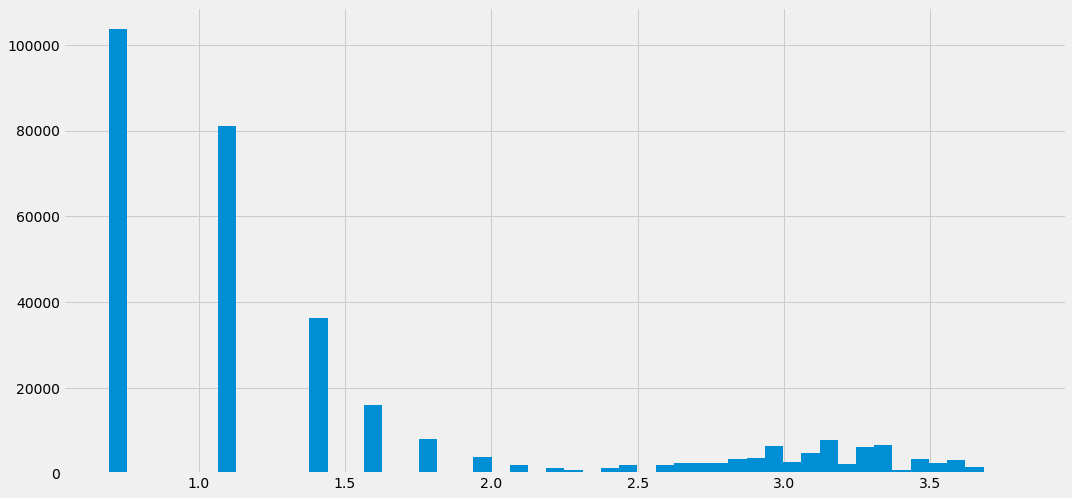

In [28]:
trn.nObserve.apply(np.log1p).hist(bins=50)

In [19]:
lr = LinearRegression()
lr.fit(trn[num_cols], np.log1p(trn[target_col]))
trn[pred_col] = np.expm1(lr.predict(trn[num_cols]))

print(f' RMSE:\t{rmse(trn[target_col], trn[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(trn[target_col], trn[pred_col]):12.2f}')

 RMSE:	        9.28
RMLSE:	        0.88


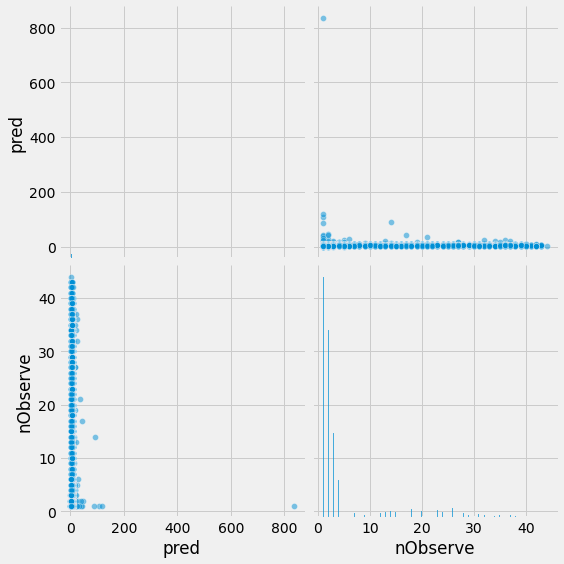

In [20]:
sns.pairplot(data=trn, vars=[pred_col, target_col], height=4, plot_kws={'alpha': .5})

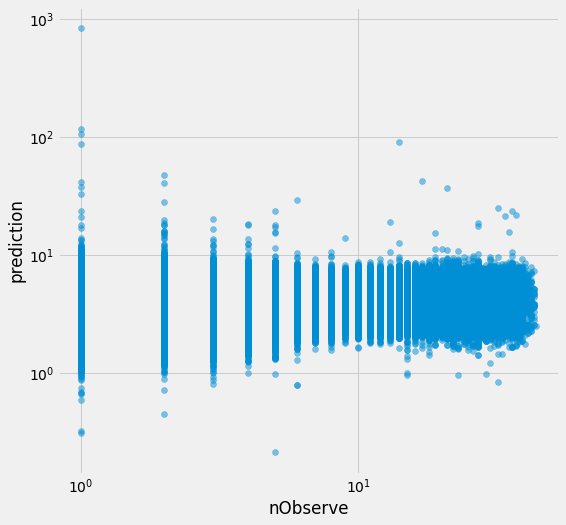

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(trn[target_col], trn[pred_col], alpha=.5)
plt.xlabel('nObserve')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')